# Step 1: Importing packages
#### We will import the pandas, numpy, matplotlib and seaborn packages

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# Step 2: Reading the input data

In [2]:

# Since this is a huge dataset with multiple columns, we have enabled the max columns to view all the columns
pd.set_option("display.max_columns", None) 

# Reading the input file
input_data = pd.read_csv('loan.csv')

# Viewing the first 5 rows of data to understand the columns and their types
input_data.head()

C:\Users\KARRISU2\AppData\Local\Temp\ipykernel_13752\1937108293.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  input_data = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
input_data.shape

(39717, 111)

#### What are we working with?
#### Our input data has 39717 rows of data and 111 columns

# Step 3: Cleaning the data
### We will perform the following operations:
1. Fix rows and columns
2. Fix missing and invalid values
3. Add derived columns

## Step 3.1: Checking the number of columns that have null values

In [4]:
((input_data.isnull().sum()/len(input_data)*100) == 100.00).sum()

np.int64(54)

#### So, 54 columns have all null values and these need to be removed from the input dataset.
#### We will create a separate dataset to work with

In [5]:
input_data_nulls_removed = input_data.dropna(axis=1, how='all') 
#input_data_nulls_removed
#input_data_nulls_removed.describe

#### Identifying the columns that have unique values equal to the number of rows i.e. each value is different
#### Such columns will not be helpful in our analysis as usually these are primary keys or created as identifiers

In [6]:
for col in input_data_nulls_removed.columns:
    if(input_data_nulls_removed[col].nunique() == len(input_data_nulls_removed)):
        print (col)

id
member_id
url


### Dropping columns with unique values equal to the number of rows

In [7]:
input_data_nulls_removed = input_data_nulls_removed.drop(['id','member_id','url'], axis=1)

#### Finding the columns that have only 1 unique value and dropping them

In [8]:
# Finding out the number of unique values in each column and sorting them in ascending order.
# So the columns with only 1 unique value will appear at the top.
input_data_nulls_removed.nunique().sort_values(ascending=True)

# Removing the columns that have only 1 unique value. Such columns will not aid in our analysis.
input_data_nulls_removed = input_data_nulls_removed.drop(['tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med'], axis=1)

#### Identifying the columns with large number of null values and dropping them

In [9]:
(input_data_nulls_removed.isnull().sum()/len(input_data_nulls_removed)*100).sort_values(ascending = False)
input_data_nulls_removed = input_data_nulls_removed.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], axis= 1)

In [10]:
#### Identifying the columns with 1 unique value and dropping them

In [11]:
input_data_nulls_removed.nunique().sort_values()
#input_data_nulls_removed['next_pymnt_d'].value_counts()
#input_data_nulls_removed.shape
input_data_nulls_removed = input_data_nulls_removed.drop(['pymnt_plan', 'initial_list_status', 'acc_now_delinq', 'application_type', 'policy_code', 'delinq_amnt'], axis = 1)

In [12]:
input_data_nulls_removed.isnull().sum().sort_values()
input_data_nulls_removed['desc']

input_data_nulls_removed = input_data_nulls_removed.drop(['desc'], axis=1)

## Step 3.2: Fixing the columns

#### Change categorical columns to numerical based on their values

In [13]:
input_data_nulls_removed.head(10)
input_data_nulls_removed['int_rate'] = input_data_nulls_removed['int_rate'].str.rstrip('%')
input_data_nulls_removed['term'] = input_data_nulls_removed['term'].str.rstrip('months')
input_data_nulls_removed['emp_length'] = input_data_nulls_removed['emp_length'].str.rstrip(' years')
input_data_nulls_removed
#input_data_nulls_removed.describe().columns
input_data_nulls_removed['int_rate'] = input_data_nulls_removed['int_rate'].astype("float")
input_data_nulls_removed['term'] = input_data_nulls_removed['term'].astype("int32")
input_data_nulls_removed['revol_util'] = input_data_nulls_removed['revol_util'].str.rstrip('%')
input_data_nulls_removed['revol_util'] = input_data_nulls_removed['revol_util'].astype("float")

In [14]:
#input_data_nulls_removed.columns

In [15]:
# for col in input_data_nulls_removed:
#    if(input_data_nulls_removed[col].dtype != np.number):
#        print (input_data_nulls_removed[col].value_counts())

In [16]:
input_data_nulls_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  int32  
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [17]:
input_data_nulls_removed['emp_length'].value_counts()

emp_length
10+    8879
< 1    4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: count, dtype: int64

In [18]:
input_data_nulls_removed['emp_length'] = input_data_nulls_removed['emp_length'].str.replace('+','')
input_data_nulls_removed['emp_length'] = input_data_nulls_removed['emp_length'].str.replace('< 1','0.75')
input_data_nulls_removed['emp_length'].value_counts()
input_data_nulls_removed['emp_length'] = input_data_nulls_removed['emp_length'].astype("float")

## Step 3.3: Derived Metrics

In [19]:
input_data_nulls_removed['loan_to_income_ratio'] = round(input_data_nulls_removed['loan_amnt']/input_data_nulls_removed['annual_inc'],2)
input_data_nulls_removed['percent_principal_received'] = round(input_data_nulls_removed['total_rec_prncp']/input_data_nulls_removed['loan_amnt'],2)

In [20]:
input_data_nulls_removed

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_to_income_ratio,percent_principal_received
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10.00,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.21,1.00
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.75,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.08,0.18
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10.00,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.20,1.00
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.00,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.20,1.00
4,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1.00,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.04,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4.00,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.1,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,0.02,1.00
39713,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3.00,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.9,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,0.47,1.00
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,0.75,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.4,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN,0.05,1.00
39715,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,0.75,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.7,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN,0.02,1.00


## Step 3.4: Filtering data

#### Since we need to identify which customer is more prone to default, we will need to consider loans that are either fully paid or charged off. We will need to exclude in progress or current loans.


In [21]:
input_data_nulls_removed = input_data_nulls_removed[input_data_nulls_removed.loan_status != 'Current']
input_data_nulls_removed.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

In [22]:
# Step 4: Exploratory Data Analyis via Visualizations

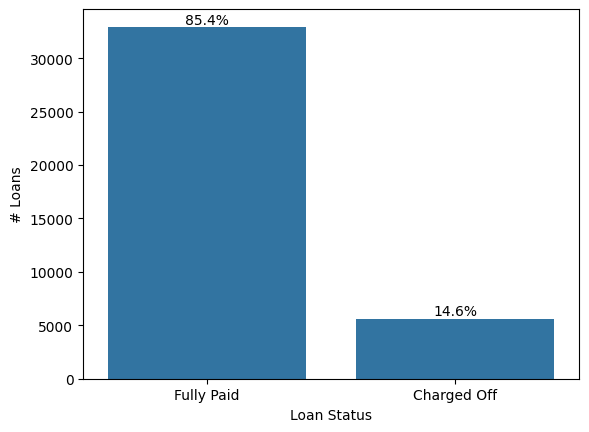

In [23]:
ax = sns.countplot(x=input_data_nulls_removed.loan_status)
total = len(input_data_nulls_removed)
for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{(x/total)*100:0.1f}%')

plt.xlabel('Loan Status')
plt.ylabel('# Loans')
plt.show()

#### Observation 1: Majority of the loans have been fully paid (85.4% of the non-current loans).

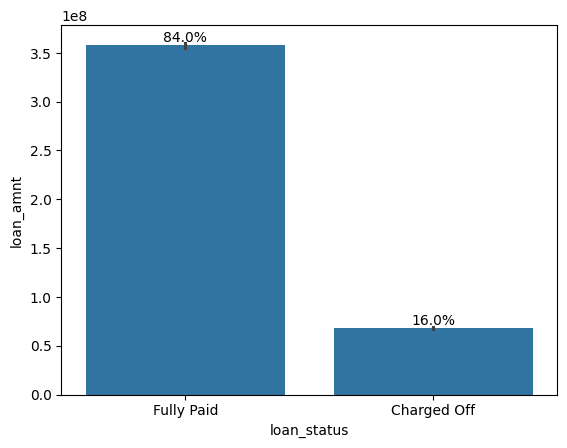

In [24]:
# Let us check the amounts in each loan status

ax=sns.barplot (data = input_data_nulls_removed, x = 'loan_status', y = 'loan_amnt', estimator=sum)
total = input_data_nulls_removed.loan_amnt.sum()

for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{(x/total)*100:0.1f}%')

#plt.yticks ([100000000, 200000000, 300000000, 400000000, 500000000])
plt.show()

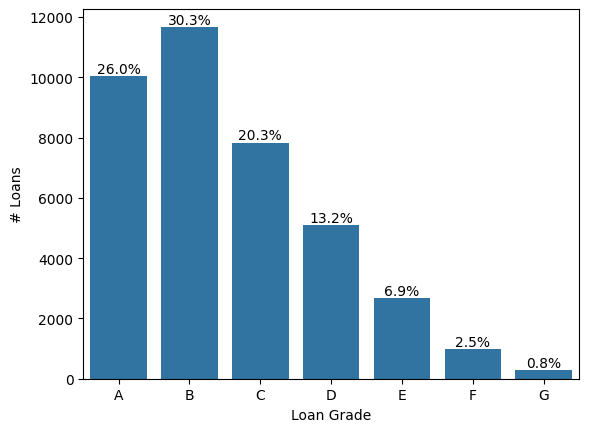

In [25]:
# Let us check the spread of the loan grades

ax=sns.countplot (data = input_data_nulls_removed, x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

total = len(input_data_nulls_removed)

for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{(x/total)*100:0.1f}%')

plt.ylabel ('# Loans')
plt.xlabel ('Loan Grade')

plt.show()

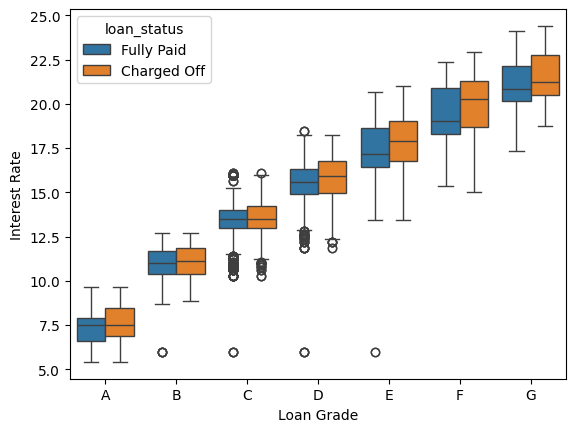

In [26]:
# Let us observe how the Loan Grade varies with the interest rates and spread across loan statuses
sns.boxplot(data=input_data_nulls_removed, y = 'int_rate', x = 'grade', hue = 'loan_status', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.ylabel ('Interest Rate')
plt.xlabel ('Loan Grade')
plt.show()

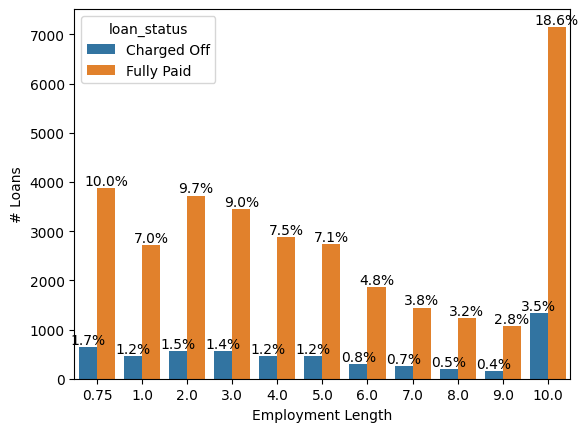

In [27]:
# Let us check the employment levels

ax=sns.countplot (data = input_data_nulls_removed, x = 'emp_length', hue = 'loan_status')

total = len(input_data_nulls_removed)

for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{(x/total)*100:0.1f}%')

plt.ylabel ('# Loans')
plt.xlabel ('Employment Length')

plt.show()

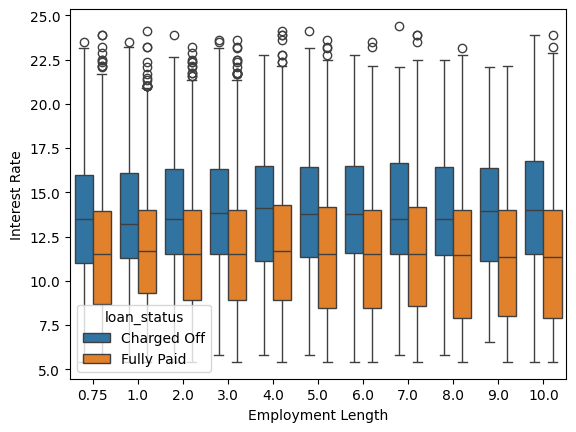

In [28]:
# Let us observe how the Loan Grade varies with the interest rates and spread across loan statuses
sns.boxplot(data=input_data_nulls_removed, y = 'int_rate', x = 'emp_length', hue = 'loan_status')
plt.ylabel ('Interest Rate')
plt.xlabel ('Employment Length')
plt.show()

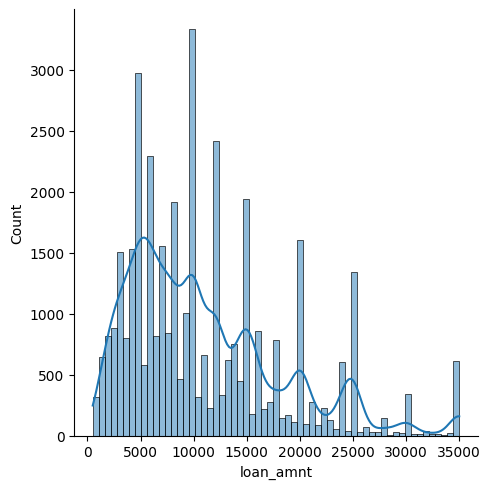

In [29]:
sns.displot(input_data_nulls_removed['loan_amnt'], kde=True)
plt.show()

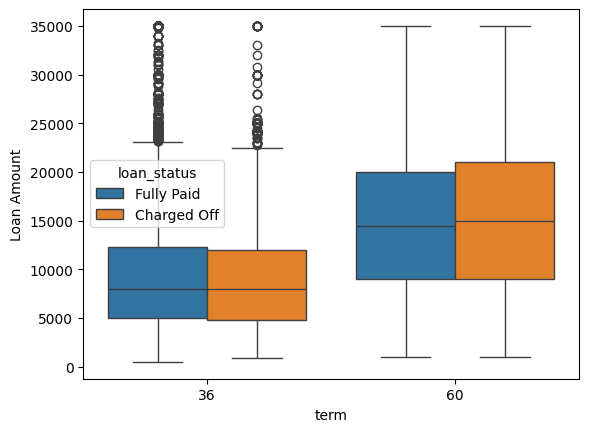

In [30]:
sns.boxplot(y=input_data_nulls_removed['loan_amnt'], x=input_data_nulls_removed['term'], hue = input_data_nulls_removed['loan_status'])
plt.ylabel('Loan Amount')
plt.show()

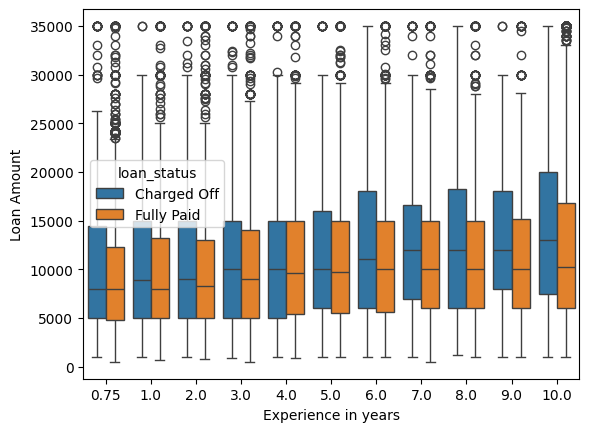

In [31]:
sns.boxplot(y=input_data_nulls_removed['loan_amnt'], x=input_data_nulls_removed['emp_length'], hue = input_data_nulls_removed['loan_status'])
plt.ylabel('Loan Amount')
plt.xlabel('Experience in years')
plt.show()

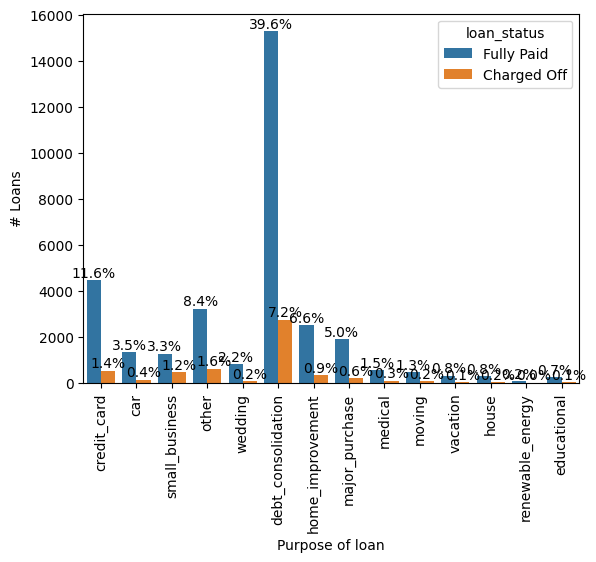

In [32]:
ax = sns.countplot(x=input_data_nulls_removed['purpose'], hue = input_data_nulls_removed['loan_status'])

total = len(input_data_nulls_removed)

for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{(x/total)*100:0.1f}%')

plt.xlabel('Purpose of loan')
plt.xticks(rotation=90)
plt.ylabel('# Loans')
plt.rcParams["figure.figsize"] = (20, 5)


plt.show()

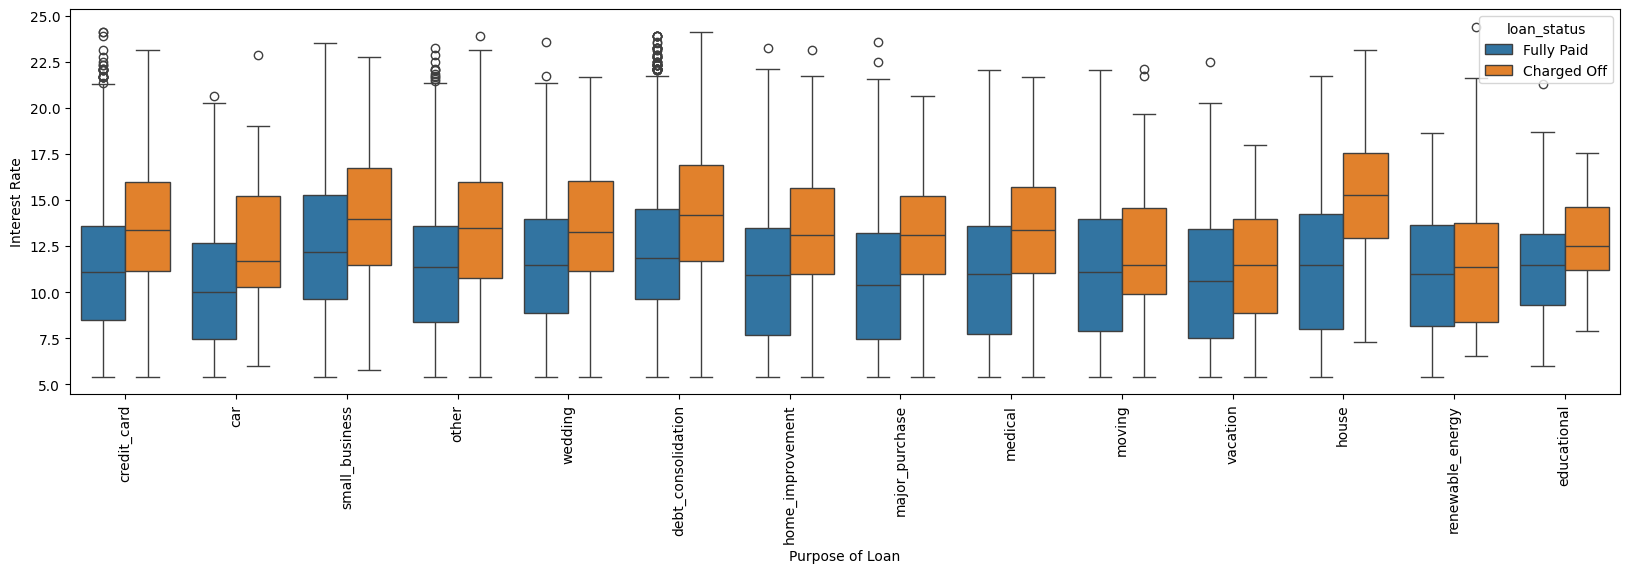

In [33]:
sns.boxplot(y=input_data_nulls_removed['int_rate'], x=input_data_nulls_removed['purpose'], hue = input_data_nulls_removed['loan_status'])
plt.ylabel('Interest Rate')
plt.xlabel('Purpose of Loan')
plt.xticks(rotation=90)
plt.show()

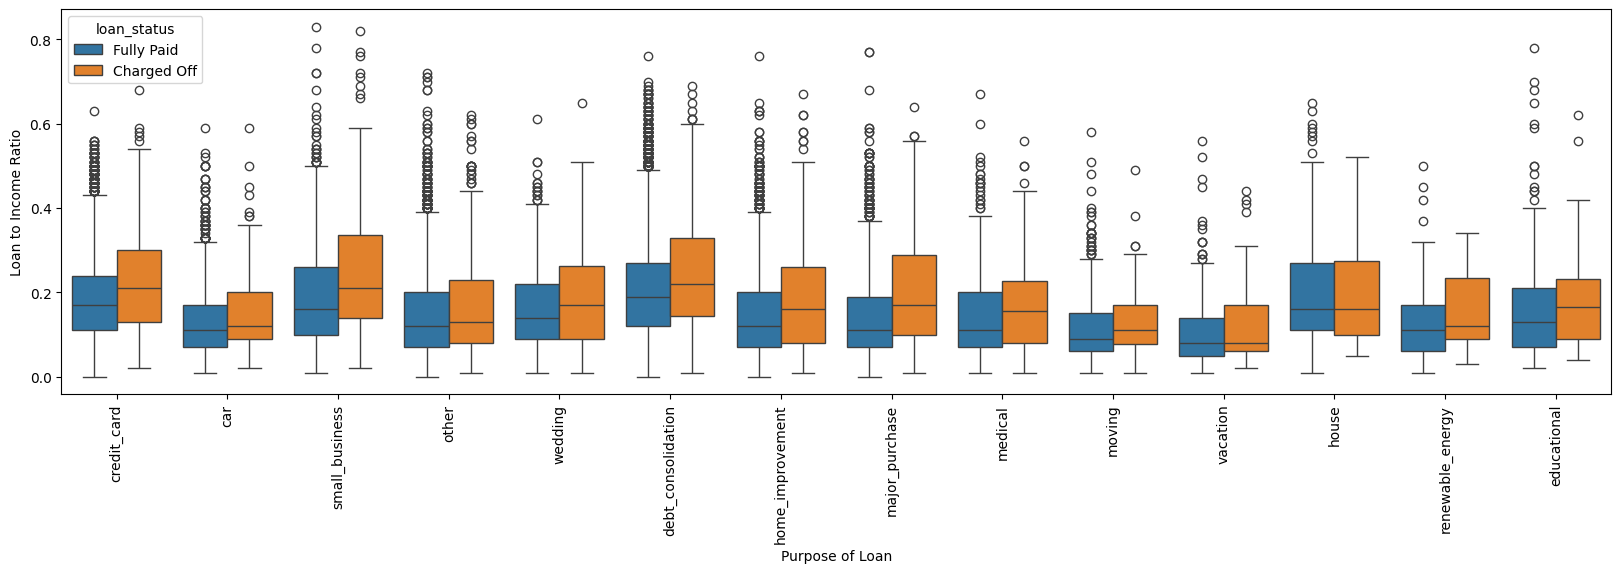

In [34]:
sns.boxplot(y=input_data_nulls_removed['loan_to_income_ratio'], x=input_data_nulls_removed['purpose'], hue = input_data_nulls_removed['loan_status'])
plt.ylabel('Loan to Income Ratio')
plt.xlabel('Purpose of Loan')
plt.xticks(rotation=90)
plt.show()

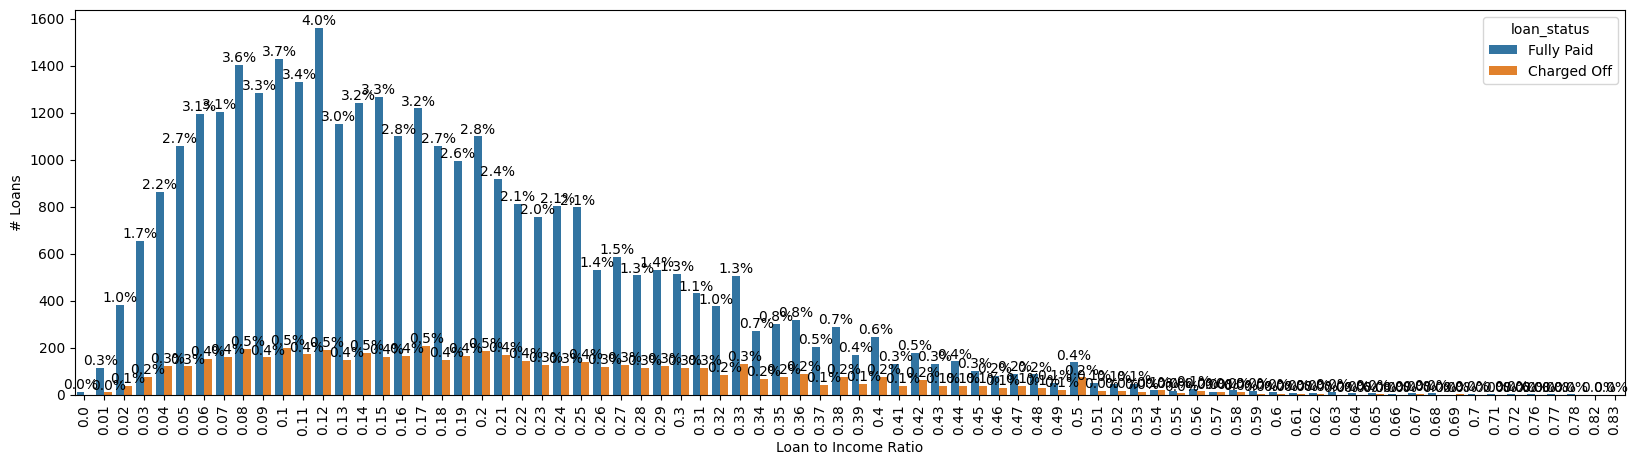

In [35]:
ax = sns.countplot(x=input_data_nulls_removed['loan_to_income_ratio'], hue = input_data_nulls_removed['loan_status'])
plt.ylabel('# Loans')
plt.xlabel('Loan to Income Ratio')
plt.xticks(rotation=90)

total = len(input_data_nulls_removed)
for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{(x/total)*100:0.1f}%')

plt.show()

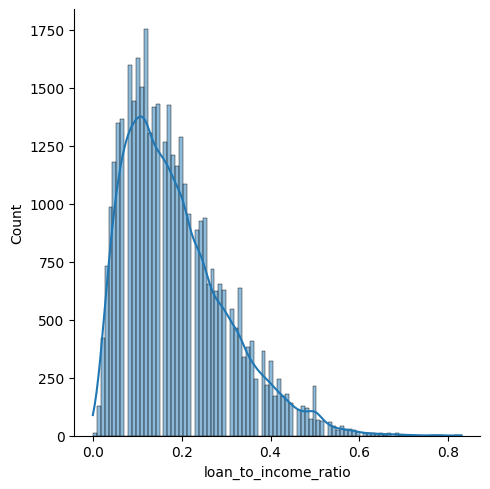

In [36]:
sns.displot(input_data_nulls_removed['loan_to_income_ratio'], kde=True)
plt.show()

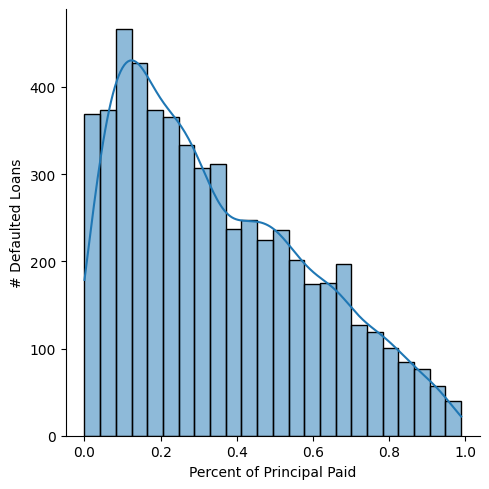

In [37]:
input_data_defaults = input_data_nulls_removed[input_data_nulls_removed['loan_status'] == 'Charged Off']
sns.displot(input_data_defaults['percent_principal_received'], kde=True)
plt.xlabel('Percent of Principal Paid')
plt.ylabel('# Defaulted Loans')
plt.show()

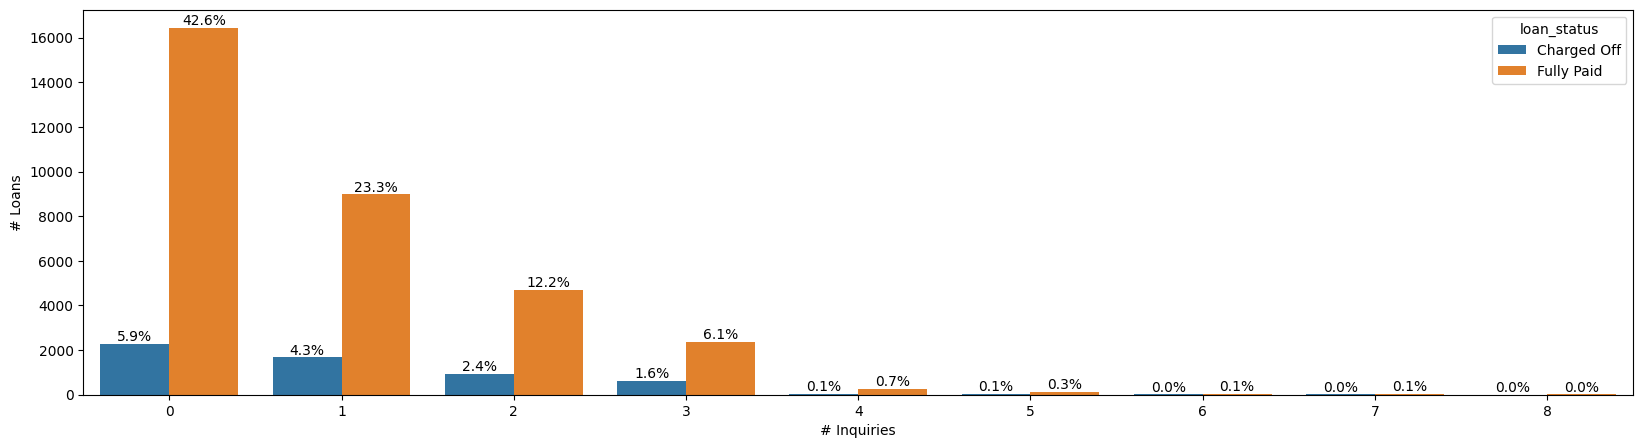

In [38]:
ax = sns.countplot(x=input_data_nulls_removed['inq_last_6mths'], hue = input_data_nulls_removed['loan_status'])
plt.ylabel('# Loans')
plt.xlabel('# Inquiries')

total = len(input_data_nulls_removed)

for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{(x/total)*100:0.1f}%')


plt.show()

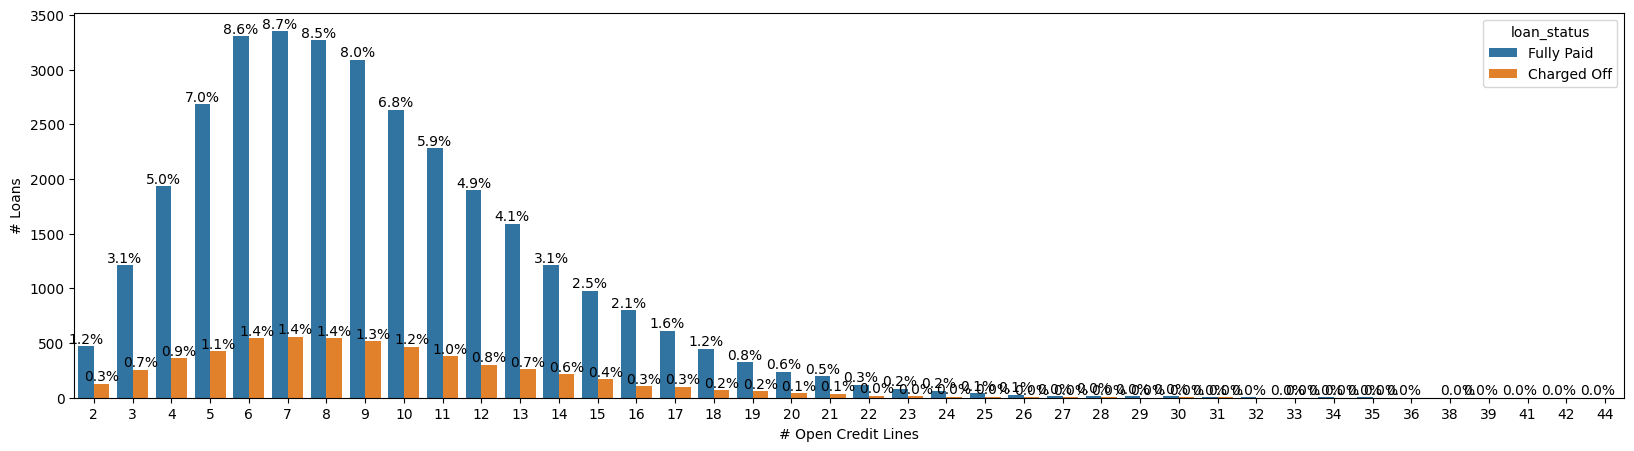

In [39]:
ax = sns.countplot(x=input_data_nulls_removed['open_acc'], hue = input_data_nulls_removed['loan_status'])
plt.ylabel('# Loans')
plt.xlabel('# Open Credit Lines')

total = len(input_data_nulls_removed)

for container in ax.containers:
    ax.bar_label(container, fmt = lambda x: f'{(x/total)*100:0.1f}%')


plt.show()

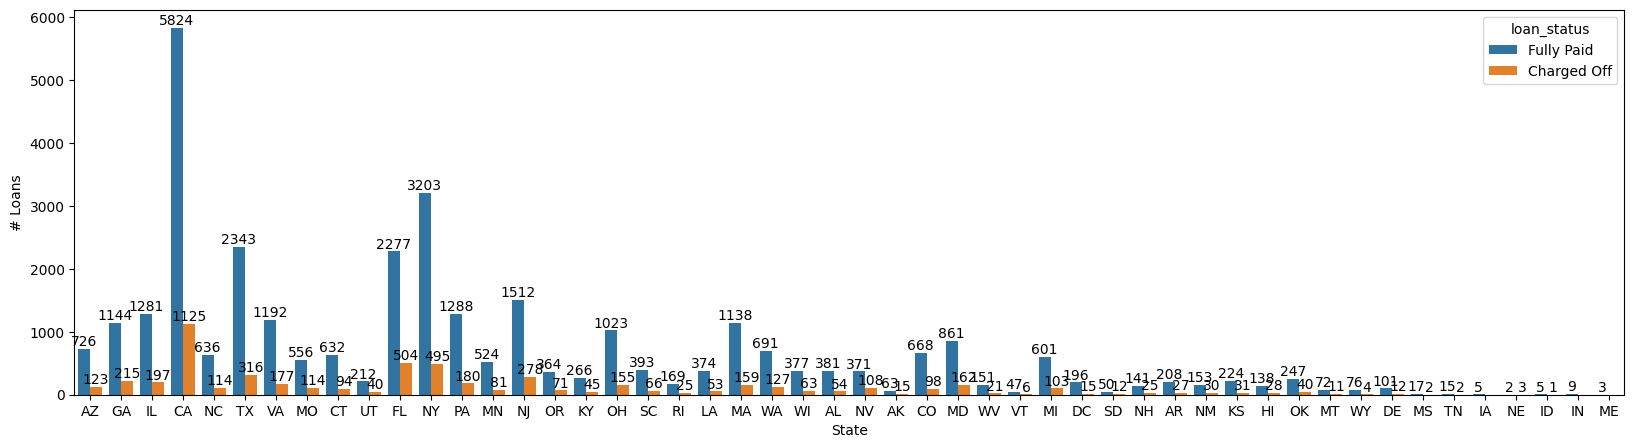

In [42]:
ax = sns.countplot(x=input_data_nulls_removed['addr_state'], hue = input_data_nulls_removed['loan_status'])
plt.ylabel('# Loans')
plt.xlabel('State')

#total = len(input_data_nulls_removed)

for container in ax.containers:
    ax.bar_label(container, )#fmt = lambda x: f'{(x/total)*100:0.1f}%')


plt.show()

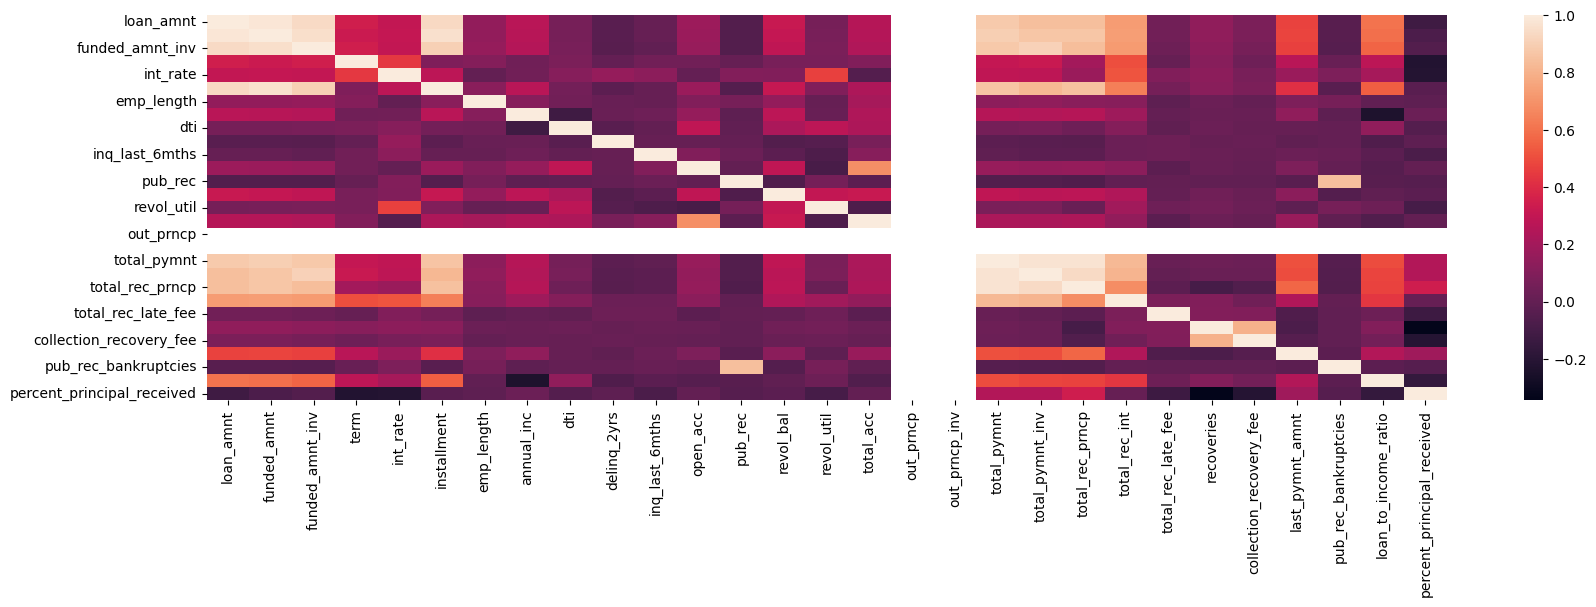

In [40]:
input_data_only_numeric_columns = input_data_nulls_removed.select_dtypes(include='number')
input_data_only_numeric_columns

corr = input_data_only_numeric_columns.corr(method = 'pearson')
sns.heatmap(corr)
plt.show()